<a href="https://colab.research.google.com/github/Kobrun4ik/Cheminformatics/blob/main/Gene_expression_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt

# Load data
X = pd.read_csv('gene_expression.csv', sep=';', header=None, decimal=',')
y = pd.read_csv('label.csv', header=None).squeeze()
genes = pd.read_csv("geneNames.txt", header=None).values.ravel()


In [9]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X, y)
train_acc = tree.score(X, y)
print(f"Training accuracy: {train_acc:.2f}")

Training accuracy: 1.00


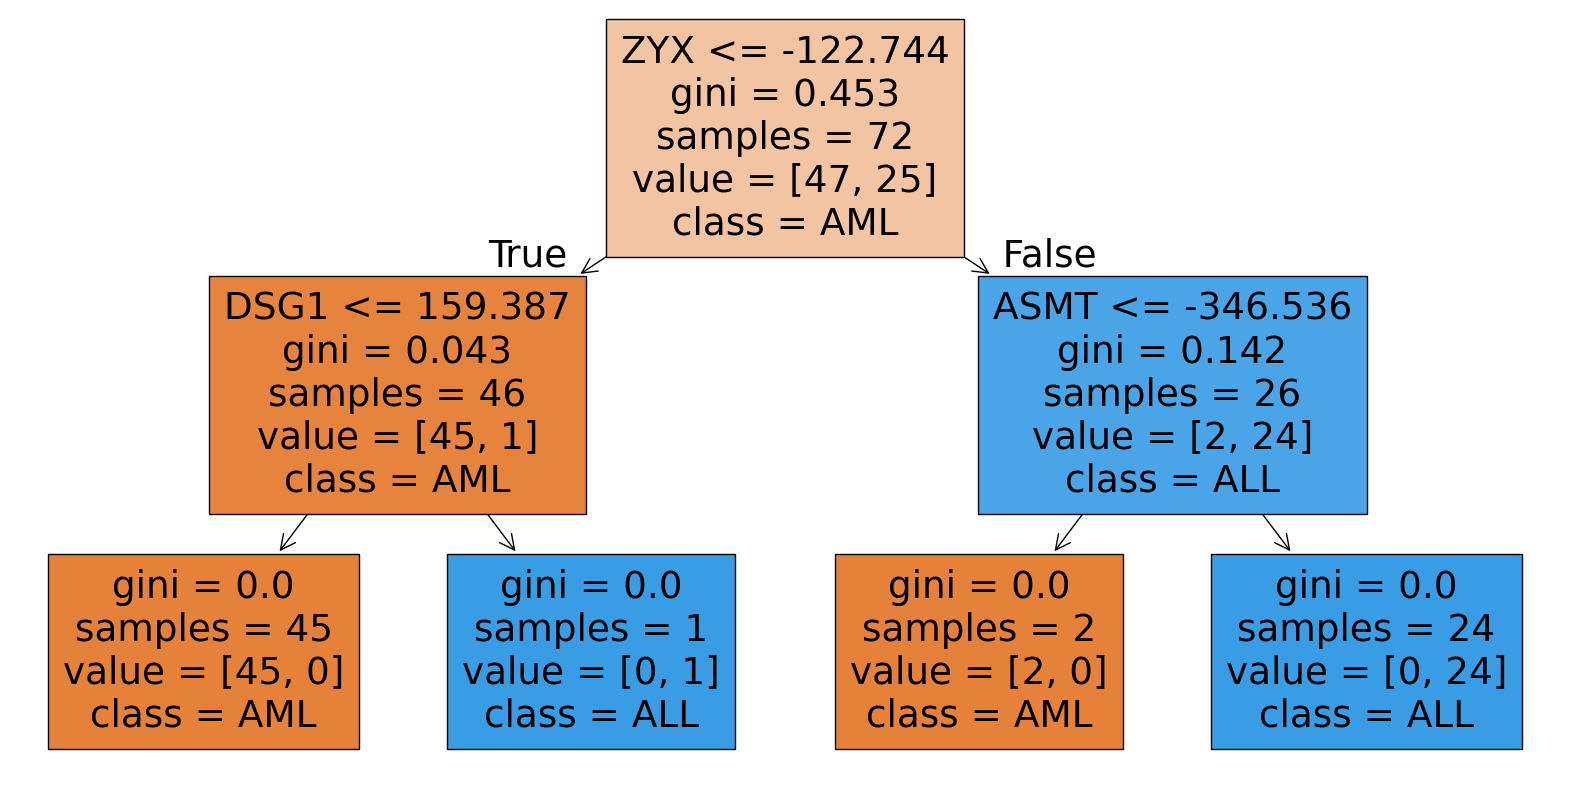

In [11]:
plt.figure(figsize=(20, 10))
plot_tree(tree, max_depth=3, feature_names=genes, class_names=['AML', 'ALL'], filled=True)
plt.show()

In [12]:
cv_scores = cross_val_score(tree, X, y, cv=5)
print(f"Cross-validation accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

Cross-validation accuracy: 0.80 ± 0.06


In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize data first (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute PCA basis
pca = PCA()
pca.fit(X_scaled)
V = pca.components_  # Each row is a principal component

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

K_range = range(1, 51)  # You can increase this if needed
accuracies = []
trees = []

for k in K_range:
    # Project data to top K components
    Z = pca.transform(X_scaled)[:, :k]

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(Z, y, stratify=y, test_size=0.2, random_state=0)

    # Train tree
    tree = DecisionTreeClassifier(random_state=0)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    trees.append(tree)

    # print(f"K={k}: Test accuracy = {acc:.2f}")

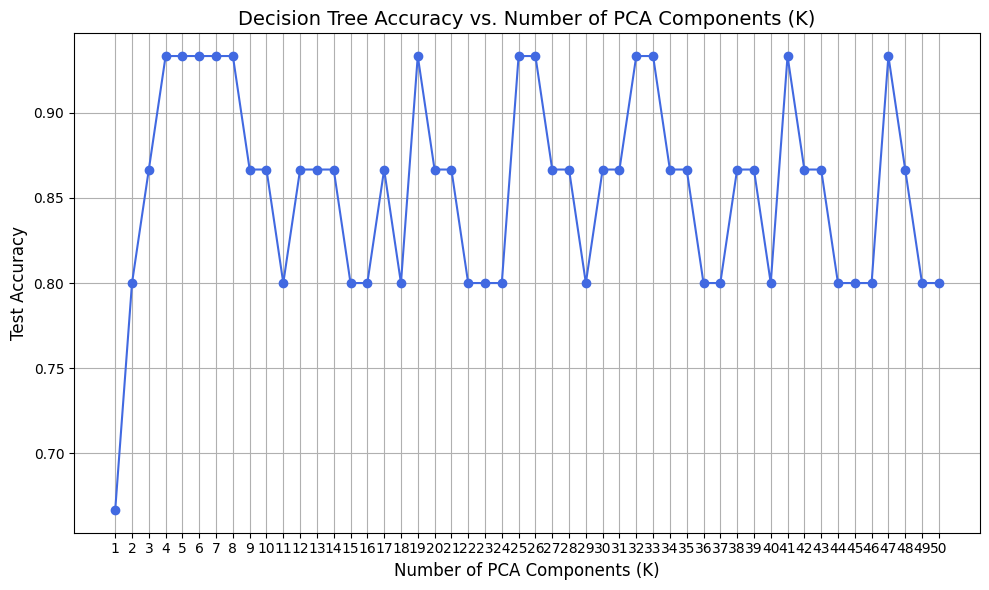

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(K_range, accuracies, marker='o', linestyle='-', color='royalblue')
plt.title('Decision Tree Accuracy vs. Number of PCA Components (K)', fontsize=14)
plt.xlabel('Number of PCA Components (K)', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)
plt.xticks(K_range)
plt.grid(True)
plt.tight_layout()
plt.show()

In [48]:
best_k = K_range[np.argmax(accuracies)]
best_tree = trees[np.argmax(accuracies)]

print(f"\nBest model: K={best_k}, Accuracy={max(accuracies):.2f}")


Best model: K=4, Accuracy=0.93


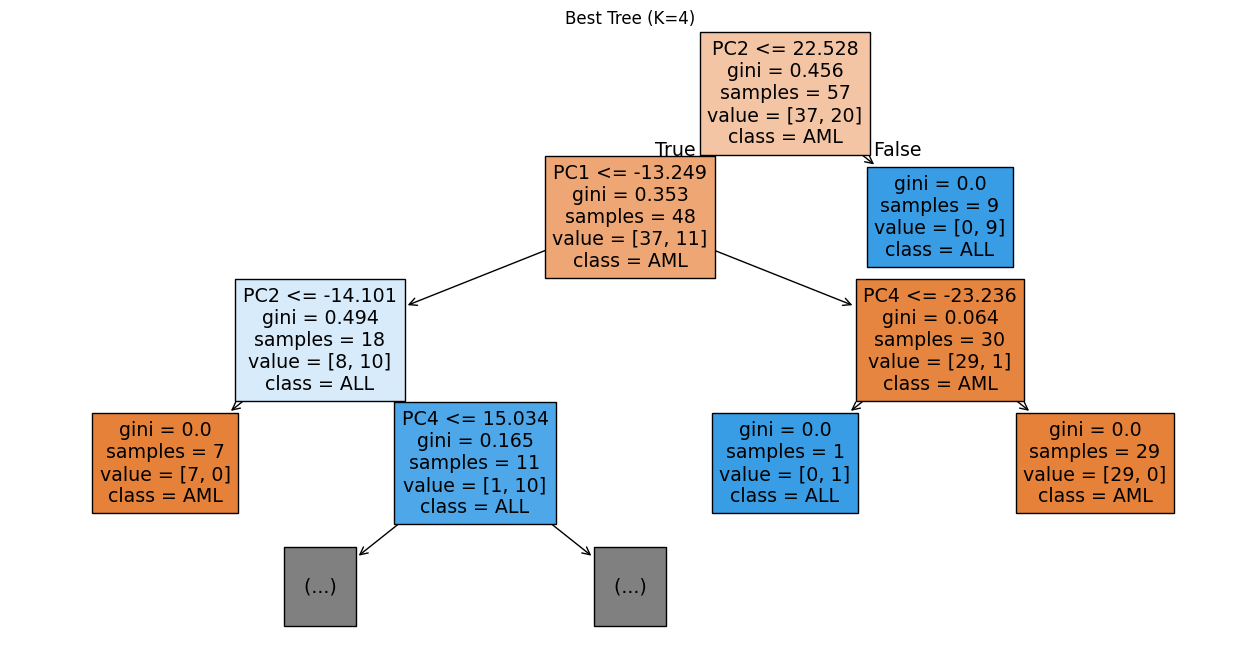

In [49]:
plt.figure(figsize=(16, 8))
plot_tree(best_tree, feature_names=[f"PC{i+1}" for i in range(best_k)],
          class_names=["AML", "ALL"], filled=True, max_depth=3)
plt.title(f"Best Tree (K={best_k})")
plt.show()

In [50]:
Z_best = pca.transform(X_scaled)[:, :best_k]
cv_scores = cross_val_score(DecisionTreeClassifier(random_state=0), Z_best, y, cv=5)
print(f"Cross-validation accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

Cross-validation accuracy: 0.90 ± 0.03


In [51]:
# Top contributing genes to PC1
pc1_loadings = V[0]  # First principal component
top_gene_indices = np.argsort(np.abs(pc1_loadings))[::-1][:10]
top_genes = genes[top_gene_indices]
top_loadings = pc1_loadings[top_gene_indices]

for gene, loading in zip(top_genes, top_loadings):
    print(f"{gene}: {loading:.4f}")

C11orf58: 0.0318
CCL22: -0.0308
UBE2V2: 0.0305
PTPN11: 0.0302
x: -0.0302
MPP2: -0.0301
x: 0.0299
x: -0.0296
UBL4A: 0.0296
CDH5: -0.0295
